In [16]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
import sklearn # scikit-learn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import openpyxl

# Impostiamo alcune opzioni grafiche per una visualizzazione più chiara
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

%matplotlib inline
''' utile per i notebook Jupyter:
senza %matplotlib inline, il grafico potrebbe non apparire nel notebook (oppure aprirsi in un’altra finestra, a seconda del backend di Matplotlib).
Con %matplotlib inline, invece, il grafico viene renderizzato subito sotto la cella di codice, come immagine statica.
'''

' utile per i notebook Jupyter:\nsenza %matplotlib inline, il grafico potrebbe non apparire nel notebook (oppure aprirsi in un’altra finestra, a seconda del backend di Matplotlib).\nCon %matplotlib inline, invece, il grafico viene renderizzato subito sotto la cella di codice, come immagine statica.\n'

### **Esercizio**: Dataset di esempio: "tips" (mance nei ristoranti)

Fare un'analisi di esplorazione del dataset riportato di seguito ed effettuare la pulizia e le altre operazioni di preprocessing viste a lezione.

| Colonna        | Tipo     | Descrizione                                           |
| -------------- | -------- | ----------------------------------------------------- |
| **total_bill** | float64  | Totale del conto del tavolo (in dollari).             |
| **tip**        | float64  | Importo della mancia data al cameriere (in dollari).  |
| **sex**        | category | Sesso del cliente che ha pagato (`Male`, `Female`).   |
| **smoker**     | category | Indica se nel gruppo c’erano fumatori (`Yes`, `No`).  |
| **day**        | category | Giorno della settimana (`Thur`, `Fri`, `Sat`, `Sun`). |
| **time**       | category | Momento del pasto (`Lunch` o `Dinner`).               |
| **size**       | int64    | Numero di persone al tavolo.                          |

In [18]:
# =============================================================================
# Dataset di esempio: "tips" (mance nei ristoranti)
# =============================================================================

tips = sns.load_dataset("tips")  # dataset integrato in seaborn
print("Prime righe del dataset:")
print(tips.head())

Prime righe del dataset:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [19]:
# Informazioni generali
print("\nInfo:")
print(tips.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [20]:
# Statistiche
print("\nStatistiche numeriche:")
tips.describe()


Statistiche numeriche:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [21]:
# Controllo valori mancanti
print("\nValori mancanti per colonna:")
print(tips.isna().sum())
print(tips.duplicated().sum())  # controllo duplicati


Valori mancanti per colonna:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
1


In [22]:
# Eliminazione colonne con informazioni ridondanti o non utili - smoker non utile ai fini della mia analisi

# Possibili studi: 1. rapporto totale/mancia, 2. incidenza del sesso del pagante, 3. mancia in base al giorno della settimana, 4. mancia in base all orario, eventalmente rapportandolo anche al giorno, 5. in base al numero di persone sedute a tavolo(size)
tips.drop(["smoker"], axis=1, inplace=True)

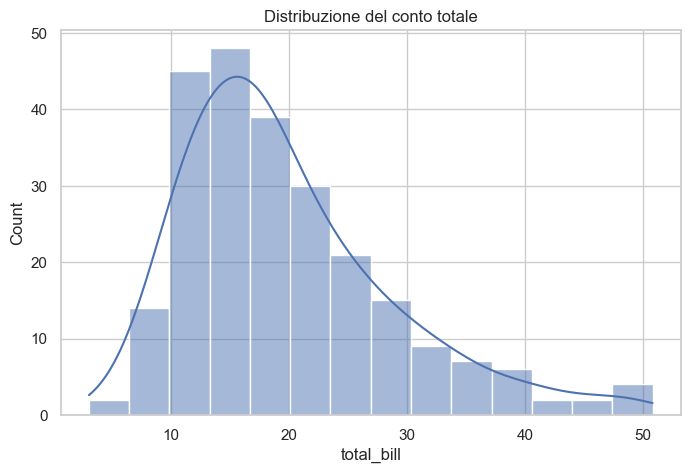

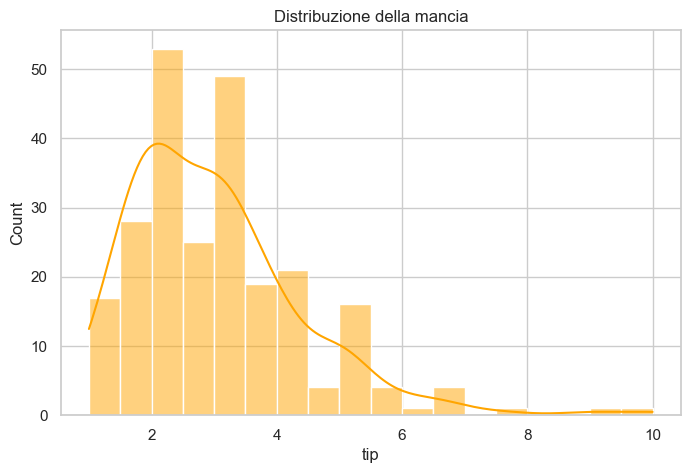

In [23]:
#Esplorazione dati con grafici

sns.histplot(tips['total_bill'], kde=True)      #kde curva di densità
plt.title("Distribuzione del conto totale") 
plt.show()

sns.histplot(tips['tip'], kde=True, color='orange')
plt.title("Distribuzione della mancia")
plt.show()

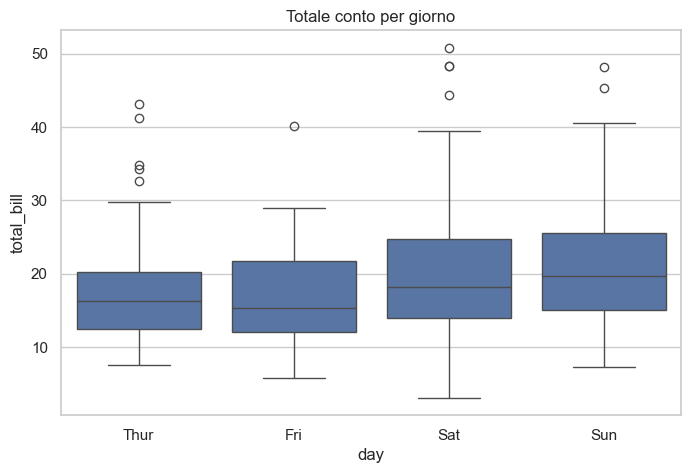

C:\Users\Valeria-WS\AppData\Local\Temp\ipykernel_5136\2272422664.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['total_bill'].mean()


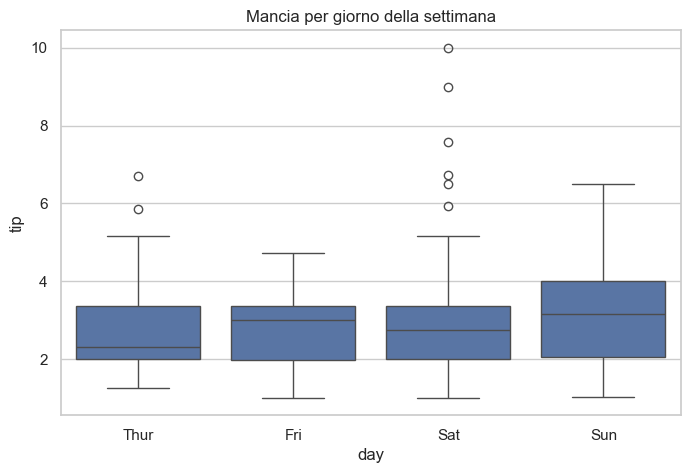

C:\Users\Valeria-WS\AppData\Local\Temp\ipykernel_5136\2272422664.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['tip'].mean()


day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [36]:
# Boxplot per categoria
sns.boxplot(data=tips, x='day', y='total_bill')
plt.title("Totale conto per giorno")
plt.show()

# Studio differenze comportamentali tra giorni della settimana
tips.groupby('day')['total_bill'].mean()


# Boxplot per categoria
sns.boxplot(data=tips, x='day', y='tip')
plt.title("Mancia per giorno della settimana")
plt.show()

# Studio differenze comportamentali tra giorni della settimana
tips.groupby('day')['tip'].mean()

# Il conto medio è più alto nel weekend (sabato e domenica)
# Si osserva un conto medio piu alto nel weekend

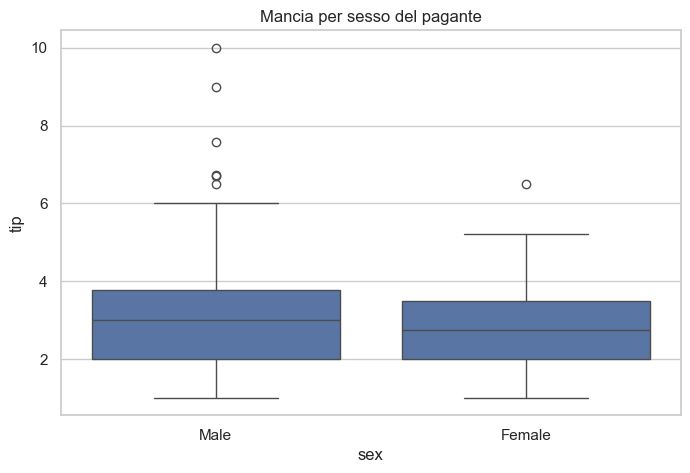

C:\Users\Valeria-WS\AppData\Local\Temp\ipykernel_5136\2128559223.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')['tip'].mean()


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [26]:
# Boxplot per categoria
sns.boxplot(data=tips, x='sex', y='tip')
plt.title("Mancia per sesso del pagante")
plt.show()
# Studio differenze comportamentali tra maschi e femmine
tips.groupby('sex')['tip'].mean()

# Le donne lasciano mance leggermente inferiori - in media - rispetto agli uomini

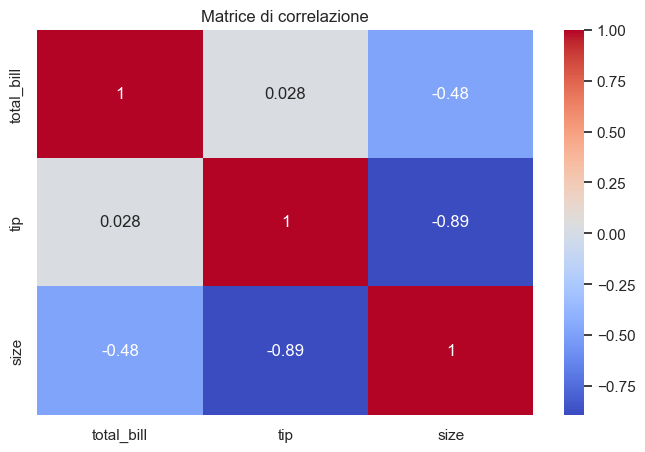

In [25]:
# Correlazione tra variabili numeriche t_bill tip e size del tavolo
corr_matrix = tips.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice di correlazione")
plt.show()

# tra total_bill e tip c'è una corr quasi nulla (0.028)  - tip non aumenta all'aumentare di t_bill
# tra total_bill e size c'è una correlazione negativa forte (-0.48) - il totale del conto diminuisce leggermente all'aumentare del numero di persone al tavolo
# tra tip e size c'è una correlazione negativa molto forte(-0.89)    - tip diminuisce repentinamente all'aumentare del numero di persone al tavolo

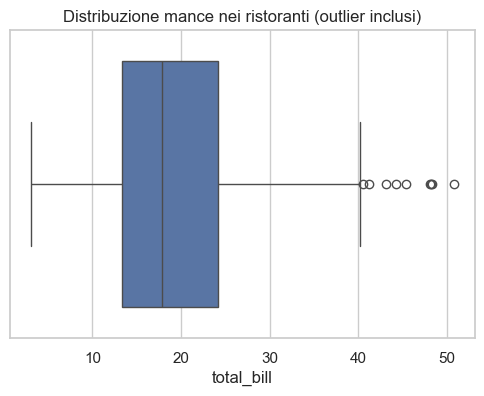

In [27]:
# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(data=tips, x="total_bill")
plt.title("Distribuzione mance nei ristoranti (outlier inclusi)")
plt.show()

In [28]:
# Rilevamento outlier tramite IQR (InterQuartile Range)
Q1 = tips["total_bill"].quantile(0.25)
Q3 = tips["total_bill"].quantile(0.75)
IQR = Q3 - Q1
# Definiamo i limiti per gli outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtriamo i valori validi
tips_clean = tips[(tips["total_bill"] >= lower_limit) & (tips["total_bill"] <= upper_limit)]

print(f"Righe originali: {len(tips)}, dopo rimozione outlier: {len(tips_clean)}")

Righe originali: 244, dopo rimozione outlier: 235


In [29]:
# Nuova feature: rapporto mancia/conto
tips_clean["tip_to_bill_ratio"] = tips_clean["tip"] / tips_clean["total_bill"]
tips_clean.head()

C:\Users\Valeria-WS\AppData\Local\Temp\ipykernel_5136\2986504858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_clean["tip_to_bill_ratio"] = tips_clean["tip"] / tips_clean["total_bill"]


,total_bill,tip,sex,day,time,size,tip_to_bill_ratio
0,16.99,1.01,Female,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,Sun,Dinner,4,0.146808


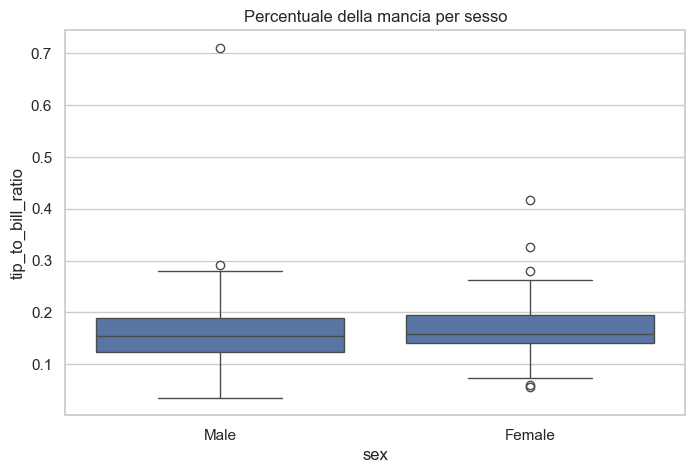

In [30]:
# Boxplot della percentuale della mancia per sesso
sns.boxplot(data=tips_clean, x='sex', y='tip_to_bill_ratio')
plt.title("Percentuale della mancia per sesso")
plt.show()


In [38]:
# Media tip_to_bill_ratio per giorno
tips_clean.groupby('day')['tip_to_bill_ratio'].mean()

C:\Users\Valeria-WS\AppData\Local\Temp\ipykernel_5136\2039027565.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_clean.groupby('day')['tip_to_bill_ratio'].mean()


day
Thur    0.162695
Fri     0.169913
Sat     0.153558
Sun     0.170263
Name: tip_to_bill_ratio, dtype: float64

In [39]:
# Feature per grandi tavoli
tips_clean['large_table'] = tips_clean['size'] >= 5 #true se size >=5, false altrimenti false
tips_clean[['size', 'large_table']].head()

C:\Users\Valeria-WS\AppData\Local\Temp\ipykernel_5136\2574718875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_clean['large_table'] = tips_clean['size'] >= 5 #true se size >=5, false altrimenti false


,size,large_table
0,2,False
1,3,False
2,3,False
3,2,False
4,4,False


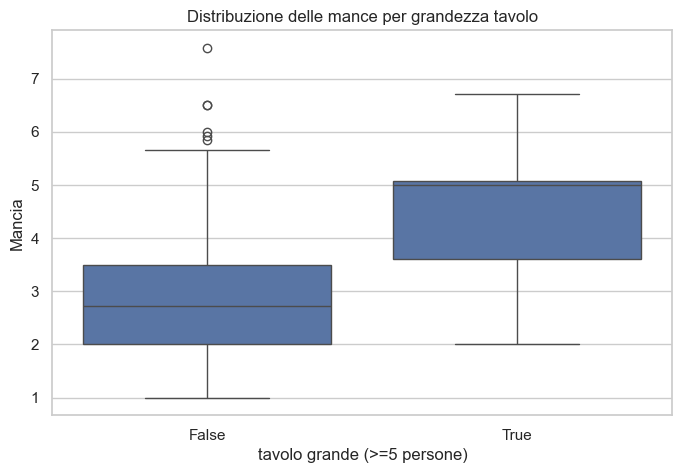

In [40]:
sns.boxplot(data=tips_clean, x='large_table', y='tip')
plt.title("Distribuzione delle mance per grandezza tavolo")
plt.xlabel("tavolo grande (>=5 persone)")
plt.ylabel("Mancia")
plt.show()

In [41]:
# Feature weekend
tips_clean['is_weekend'] = tips_clean['day'].isin(['Sat', 'Sun'])
tips_clean[['day', 'is_weekend']].head()

C:\Users\Valeria-WS\AppData\Local\Temp\ipykernel_5136\1450977431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_clean['is_weekend'] = tips_clean['day'].isin(['Sat', 'Sun'])


,day,is_weekend
0,Sun,True
1,Sun,True
2,Sun,True
3,Sun,True
4,Sun,True


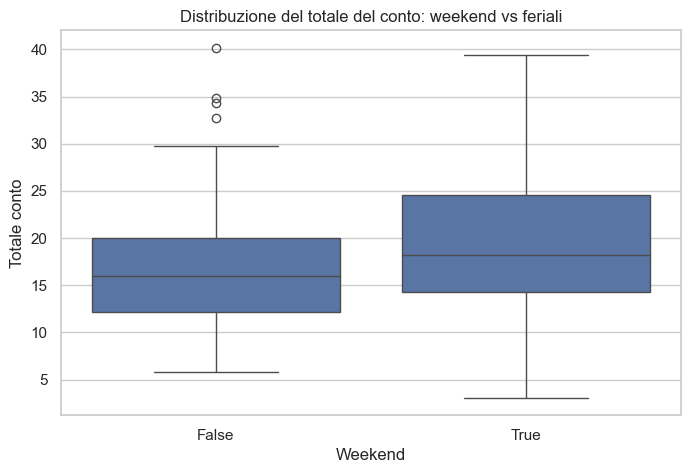

In [42]:
# Statistiche per weekend vs feriali
sns.boxplot(data=tips_clean, x='is_weekend', y='total_bill')
plt.title("Distribuzione del totale del conto: weekend vs feriali")
plt.xlabel("Weekend")
plt.ylabel("Totale conto" )
plt.show()

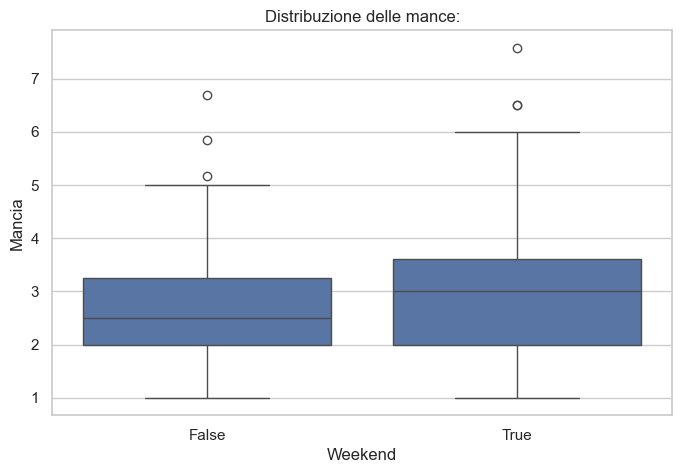

In [43]:
# Statistiche per weekend vs feriali - mance
sns.boxplot(data=tips_clean, x='is_weekend', y='tip')
plt.title("Distribuzione delle mance:")
plt.xlabel("Weekend")
plt.ylabel("Mancia")
plt.show()

In [44]:
# Trransformazione di variabili categoriche - potevo farle prima ma vabbe

#Lablel Encoding
le = LabelEncoder()
tips_clean['sex_ecoded'] = le.fit_transform(tips_clean['sex'])
tips_clean['time_encoded'] = le.fit_transform(tips_clean['time'])
tips_clean.head()

C:\Users\Valeria-WS\AppData\Local\Temp\ipykernel_5136\2893372302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_clean['sex_ecoded'] = le.fit_transform(tips_clean['sex'])
C:\Users\Valeria-WS\AppData\Local\Temp\ipykernel_5136\2893372302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_clean['time_encoded'] = le.fit_transform(tips_clean['time'])


,total_bill,tip,sex,day,time,size,tip_to_bill_ratio,large_table,is_weekend,sex_ecoded,time_encoded
0,16.99,1.01,Female,Sun,Dinner,2,0.059447,False,True,0,0
1,10.34,1.66,Male,Sun,Dinner,3,0.160542,False,True,1,0
2,21.01,3.50,Male,Sun,Dinner,3,0.166587,False,True,1,0
3,23.68,3.31,Male,Sun,Dinner,2,0.139780,False,True,1,0
4,24.59,3.61,Female,Sun,Dinner,4,0.146808,False,True,0,0


In [45]:
#One-Hot Encoding
tips_encoded = pd.get_dummies(tips_clean, columns=['day'])
tips_encoded.head()

,total_bill,tip,sex,time,size,tip_to_bill_ratio,large_table,is_weekend,sex_ecoded,time_encoded,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,Dinner,2,0.059447,False,True,0,0,False,False,False,True
1,10.34,1.66,Male,Dinner,3,0.160542,False,True,1,0,False,False,False,True
2,21.01,3.50,Male,Dinner,3,0.166587,False,True,1,0,False,False,False,True
3,23.68,3.31,Male,Dinner,2,0.139780,False,True,1,0,False,False,False,True
4,24.59,3.61,Female,Dinner,4,0.146808,False,True,0,0,False,False,False,True


In [46]:
#Ordinal Encoding - non ha senso farlo qui ma lo mostro comunque

def size_to_ordinal(size):
    if size <= 2:
        return 'small'
    elif 2 < size <= 4:
        return 'medium'
    elif 5 <= size <= 7:
        return 'large'
    else:
        return 'extra large'

tips_encoded['size_category'] = tips_encoded['size'].apply(size_to_ordinal)
ordinal_mapping = {'small': 1, 'medium': 2, 'large': 3, 'extra large': 4}
tips_encoded['size_ordinal'] = tips_encoded['size_category'].map(ordinal_mapping)
tips_encoded.head()

,total_bill,tip,sex,time,size,tip_to_bill_ratio,large_table,is_weekend,sex_ecoded,time_encoded,day_Thur,day_Fri,day_Sat,day_Sun,size_category,size_ordinal
0,16.99,1.01,Female,Dinner,2,0.059447,False,True,0,0,False,False,False,True,small,1
1,10.34,1.66,Male,Dinner,3,0.160542,False,True,1,0,False,False,False,True,medium,2
2,21.01,3.50,Male,Dinner,3,0.166587,False,True,1,0,False,False,False,True,medium,2
3,23.68,3.31,Male,Dinner,2,0.139780,False,True,1,0,False,False,False,True,small,1
4,24.59,3.61,Female,Dinner,4,0.146808,False,True,0,0,False,False,False,True,medium,2


In [47]:
# Rimuovere colonne indesiderate : size size ordinal sez time day
tips_cleaned = tips_encoded.drop(columns=['size', 'size_ordinal', 'sex', 'time', 'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun'])

# Controllo il risultato
tips_cleaned.head()

,total_bill,tip,tip_to_bill_ratio,large_table,is_weekend,sex_ecoded,time_encoded,size_category
0,16.99,1.01,0.059447,False,True,0,0,small
1,10.34,1.66,0.160542,False,True,1,0,medium
2,21.01,3.50,0.166587,False,True,1,0,medium
3,23.68,3.31,0.139780,False,True,1,0,small
4,24.59,3.61,0.146808,False,True,0,0,medium
